## Week 11

### Decision Tree:

-Decision Tree are versatile machine learning algorithms that can perform both classification and regression tasks, and even multiple output tasks.    

#### Types: 

-A Decision Tree is a Supervised Machine Learning algorithm used for:  

✅ Classification (predicting categories like Yes/No, Spam/Not Spam)  
✅ Regression (predicting numerical values like price, salary)

-A Decision Tree is a model that makes decisions by asking a series of if-else questions until it reaches a final answer.

📌Example:

If Age > 18 → Adult  
Else → Minor

It keeps splitting the data based on conditions.

🌳 Structure of a Decision Tree:

1. Root Node – The first question  
2. Internal Nodes – More questions based on features  
3. Branches – Possible answers to the questions  
4. Leaf Nodes – Final prediction

#### Classification :

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Create Dataset
data = {
    'Outlook': ['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain'],
    'Temperature': ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild'],
    'Humidity': ['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal'],
    'Windy': ['No','Yes','No','No','No','Yes','Yes','No','No','No'],
    'Play': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes']
}

df = pd.DataFrame(data)
df


,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,No,No
1,Sunny,Hot,High,Yes,No
2,Overcast,Hot,High,No,Yes
3,Rain,Mild,High,No,Yes
4,Rain,Cool,Normal,No,Yes
5,Rain,Cool,Normal,Yes,No
6,Overcast,Cool,Normal,Yes,Yes
7,Sunny,Mild,High,No,No
8,Sunny,Cool,Normal,No,Yes
9,Rain,Mild,Normal,No,Yes


C:\Users\jadha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Prediction for Age 20: Yes


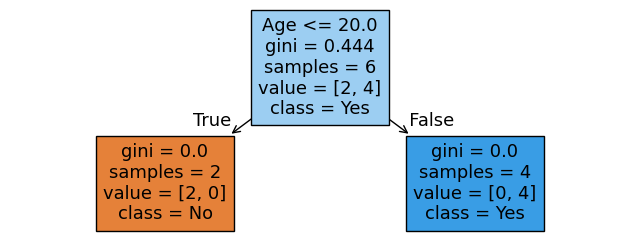

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Create Dataset
data = {
    'Age': [18, 22, 25, 35, 40, 15],
    'Buy': [0, 1, 1, 1, 1, 0]   # 0 = No, 1 = Yes
}

df = pd.DataFrame(data)

# Step 2: Separate Features and Target
X = df[['Age']]
y = df['Buy']

# Step 3: Create Model
model = DecisionTreeClassifier(criterion='gini')

# Step 4: Train Model
model.fit(X, y)

# Step 5: Predict
prediction = model.predict([[30]])

print("Prediction for Age 20:", "Yes" if prediction[0] == 1 else "No")

# Step 6: Visualize Tree
plt.figure(figsize=(8,3))
plot_tree(model, feature_names=['Age'], class_names=['No','Yes'], filled=True)
plt.show()

#### Logistic Regression:


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [26]:
# Sample Data
X = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
y = np.array([5,7,9,10,12,15,18,20,23,25])

X
y

array([ 5,  7,  9, 10, 12, 15, 18, 20, 23, 25])

In [22]:
# Create Model
model = DecisionTreeRegressor(max_depth=3)

# Train Model
model.fit(X, y)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_le

In [23]:
# Predict
y_pred = model.predict(X)

print("Predicted Values:", y_pred)

Predicted Values: [ 5.   7.   9.5  9.5 12.  15.  19.  19.  23.  25. ]


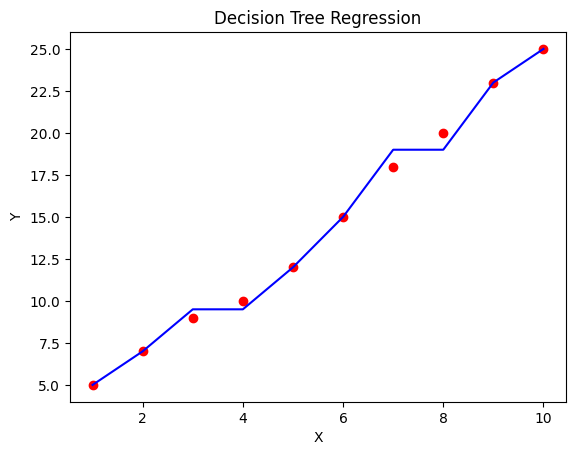

In [24]:
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, color='blue')
plt.title("Decision Tree Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

🔴 Red dots = Original data  
🔵 Blue line = Tree prediction

Notice: Tree prediction is step-like structure  
(because tree splits into regions)

.

### Entropy:

📌 What is Entropy?

Entropy is a measure of impurity or randomness in the dataset.

👉 Decision Tree madhe entropy use karto to check how mixed the data is.  
👉 Low entropy = data pure (mostly one class)  
👉 High entropy = data mixed (random)

🧠 Simple Meaning

Jar dataset madhe sagle values same astil → Entropy = 0 (Pure)  
Jar 50% Yes ani 50% No astil → Entropy = 1 (Maximum impurity)

#### Entropy Range:

| Entropy Value | Meaning                        |
| ------------- | ------------------------------ |
| 0             | Pure                           |
| 0.5           | Medium impurity                |
| 1             | Maximum impurity (binary case) |

#### 1️⃣ Manual Python Implementation of Entropy:

In [1]:
import numpy as np

def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    
    ent = 0
    for p in probabilities:
        ent -= p * np.log2(p)
    
    return ent

# Example data
y = ['Yes', 'Yes', 'Yes', 'No', 'No', 'No']

print("Entropy:", entropy(y))

Entropy: 1.0


- ✔ Because data is 50-50 mixed.

#### 2️⃣ Different Distribution:

In [2]:
y2 = ['Yes', 'Yes', 'Yes', 'Yes', 'No']

print("Entropy:", entropy(y2))

Entropy: 0.7219280948873623


- 👉 Less than 1 → More pure than previous case.

#### 3️⃣ Using Decision Tree (Built-in Entropy)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Decision Tree using entropy
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

print("Model trained using Entropy criterion")